## DBSCAN
: 밀도 기반 클러스터링. 밀도 차이를 자동으로 감지하여 군집을 생성하기 때문에 사용자가 군집 개수를 지정할 수 없다.<br>
또한, 밀도차이가 너무 나는 데이터들은 아웃라이어로 인식하여 노이즈로 빼버린다.<br>
<img src=https://blog.kakaocdn.net/dn/caWguL/btrFGSVq3td/ibof9hk5QDtEwr04TE030k/img.png width=1000>

**클러스터링 알고리즘별 군집화 비교**
- DBSCAN은 복잡한 기하구조를 가진 데이터셋에 대해 군집화 성능이 좋다. (밀도가 크게 변하지 않다면)
- 단점: 밀도가 자주변하거나, 아예 모든 데이터 밀도가 비슷하면 군집화 성능이 떨어진다.
    - DBSCAN에서 검은색애들은 노이즈로 처리한 애들이다.
<br>
<img src=https://blog.kakaocdn.net/dn/ee6R0n/btrFFPd3UGW/GteFeQf0SkbCkoJr5CXOtk/img.png width=1000>

### DBSCAN 파라미터와 구성 요소
1. 입실론(epsilon): 개별 데이터를 중심으로 주변 영역 반경
2. min potions: 입실론 영역에 포함되는 타 데이터 개수
<br>
<img src=https://blog.kakaocdn.net/dn/wTuaj/btrFGfXUVVM/JcerQOmTtsjYDOjhiFQtXK/img.png width=1000>

- 위 파라미터로 결정되는 DBSCAN의 구성요소
<br>
<img src=https://blog.kakaocdn.net/dn/1k2kX/btrFE5BZVS4/rzdfG9Nn3J16jKgty4NHzK/img.png width=1000>

### DBSCAN 절차
1. P1~P12 까지 12개 데이터 존재
2. P1을 기준으로 eps 반경안에 7개 데이터 존재 -> Core Point
3. 다음으로 P2를 보면 eps 반경안에 6개 데이터 있으므로 -> 다음 Core Point
4. P1 핵심 포인트와 P2 핵심 포인트가 eps 영역에 같이 있으므로 연결가능
5. 즉, P1과 P2 두 핵심 포인트를 연결하여 군집화 구성
6. 그에 반해, P3는 eps 영역안에는 최소 데이터 만족 못하지만, P2(핵심 포인트)가 있으므로, 경계 포인트로 지정
<br>
<img src=https://blog.kakaocdn.net/dn/cbEvQk/btrFHshSdC2/8BdtNv3kioISFYy7gE8Pok/img.png width=1200>

7. 다음으로, P5는 eps내 최소 데이터도 만족 못하고, 핵심포인트도 없으므로, Noise Point로 지정<br>
<img src=https://blog.kakaocdn.net/dn/dBa1QB/btrFFn3r0uf/4g2KTaGZjdbRBlEoUkQFY0/img.png width=1000>

### 사이킷런 DBSCAN
- eps: 입실론 주변 영역의 반경.
- min_samples: 자기자신 포함해서, eps 영역안에 있어야 하는 최소 데이터 개수 (앞에서 설명한 min points + 1)<br>
<img src=https://blog.kakaocdn.net/dn/dhdK7b/btrFFnCrDVD/t41iYBp80SRyd90wXp8v91/img.png width=1000>

## DBSCAN 적용하기 – 붓꽃 데이터 셋

In [2]:
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### **eps 0.6, min_samples=8**

In [6]:
from sklearn.cluster import DBSCAN
# eps
# metric='euclidean' - 데이터들간의 거리측정은 유클리디안 거리로
dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
# -1은 노이즈를 의미한다.
# 결과를 보면 타겟 1,2가 모두 1로 클러스터된것을 볼 수 있다.

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


In [14]:
## 그래프 스타일 설정
plt.rcParams['xtick.color'] = 'white';plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.color'] = 'white';plt.rcParams['ytick.labelsize']=15
plt.rcParams['axes.labelcolor'] = 'white';plt.rcParams['axes.labelsize']= 17
plt.rcParams['axes.titlecolor']= 'white';plt.rcParams['axes.titlesize']= 20
plt.rcParams['figure.figsize'] = (10,6)

### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=700, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

### **PCA 2개 컴포넌트 차원 축소 후 시각화**

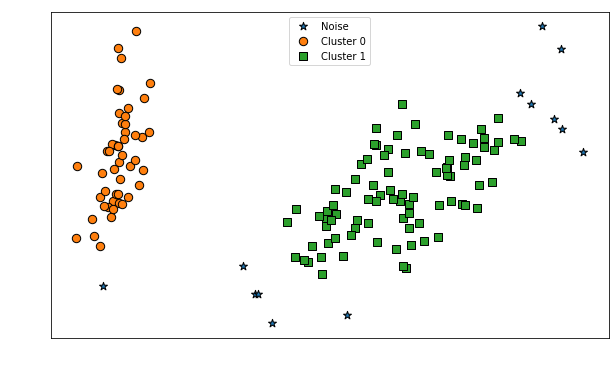

In [10]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
# visualize_cluster_2d( ) 함수는 ftr1, ftr2 컬럼을 좌표에 표현하므로 PCA 변환값을 해당 컬럼으로 생성
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

### **eps의 크기를 증가 한 후 노이즈 확인**
-> eps가 넓어져서 최소데이터 만족이 쉬워지기 때문에, 노이즈는 감소

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


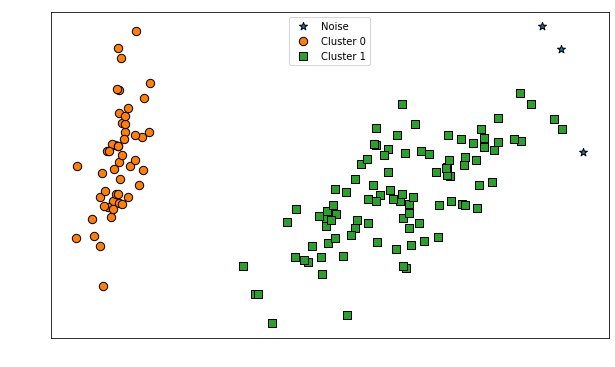

In [11]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

### **min_samples 크기 증가 후 노이즈 확인**
-> 최소 데이터 만족이 어려워 지기 때문에, 노이즈 발생이 쉬워진다. -> 노이즈 증가

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


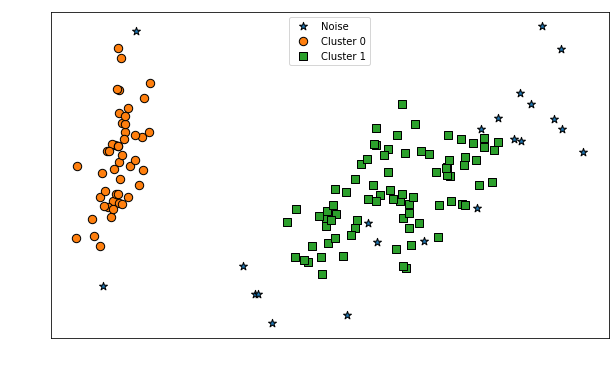

In [12]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

## DBSCAN 적용하기 – make_circles() 데이터 세트
-> DBSCAN을 기하학적으로 더 어려운 데이터 분포에 적용해보기

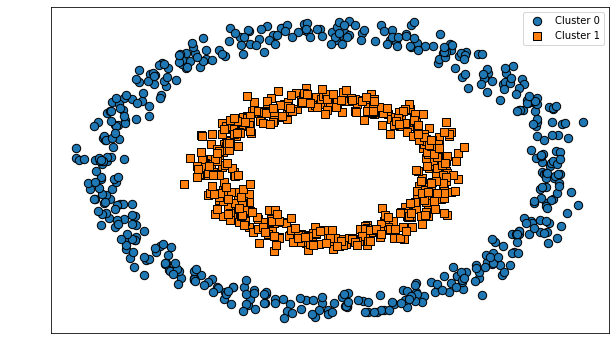

In [13]:
from sklearn.datasets import make_circles
# make_circles함수: Make a large circle containing a smaller circle in 2d.
X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

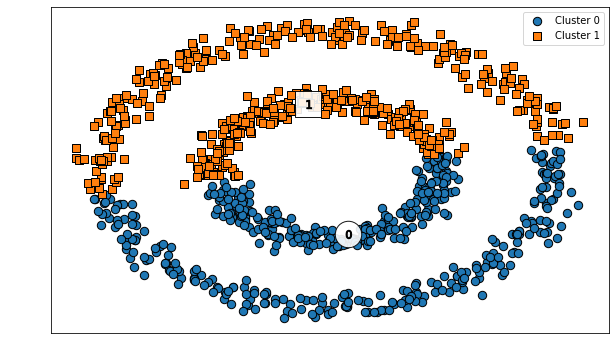

In [15]:
# KMeans로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

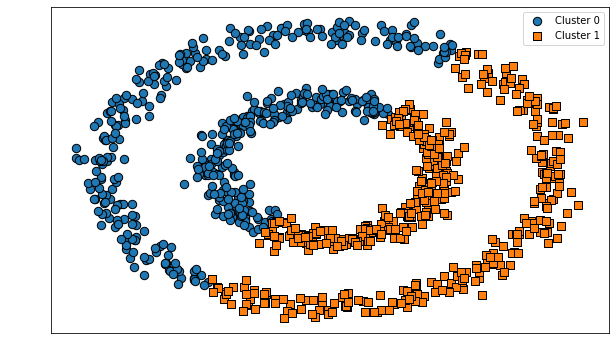

In [16]:
# GMM으로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

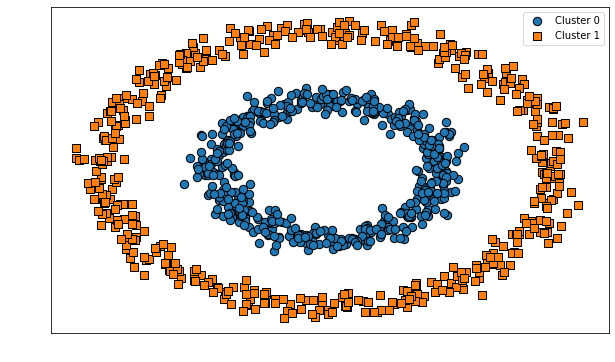

In [17]:
# DBSCAN으로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)